In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

# load data and assign column names
data = pd.read_csv('quotes.csv', header=None, sep = ',')
data

/var/folders/sn/jv8q19ts7p1cd4qlt53d6w800000gn/T/ipykernel_39246/461647634.py:8: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,29,31,36,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('quotes.csv', header=None, sep = ',')


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,1,2,3,4,5,6,7,8.0,9.0,...,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499705,I do believe the most important thing I can do...,John C. Stennis,"Past, Believe, Help",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499706,I'd say I'm a bit antimadridista although I do...,Isco,"Team, Humility, Know",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499707,The future is now.,Nam June Paik,Now,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499708,"In all my life and in the future, I will alway...",Norodom Sihamoni,"Life, My Life, Servant",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = data.drop(data.iloc[:, 3:42],axis = 1)

In [3]:
df2

,0,1,2
0,0,1,2
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
2,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
3,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."
4,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love"
...,...,...,...
499705,I do believe the most important thing I can do...,John C. Stennis,"Past, Believe, Help"
499706,I'd say I'm a bit antimadridista although I do...,Isco,"Team, Humility, Know"
499707,The future is now.,Nam June Paik,Now
499708,"In all my life and in the future, I will alway...",Norodom Sihamoni,"Life, My Life, Servant"


In [4]:
df2.shape

(499710, 3)

In [5]:
df2 = df2.drop_duplicates().reset_index()

In [6]:
df2.columns = ['Index','Quote', 'Author', 'Tags']
df2 = df2.drop('Index', axis=1)
df2

,Quote,Author,Tags
0,0,1,2
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
2,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
3,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."
4,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love"
...,...,...,...
497263,I do believe the most important thing I can do...,John C. Stennis,"Past, Believe, Help"
497264,I'd say I'm a bit antimadridista although I do...,Isco,"Team, Humility, Know"
497265,The future is now.,Nam June Paik,Now
497266,"In all my life and in the future, I will alway...",Norodom Sihamoni,"Life, My Life, Servant"


In [7]:
nan_counts = df2.isna().sum()
print(nan_counts)

Quote        1
Author    1753
Tags        63
dtype: int64


In [8]:
df2.dropna(inplace = True)
df2

,Quote,Author,Tags
0,0,1,2
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
2,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
3,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."
4,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love"
...,...,...,...
497263,I do believe the most important thing I can do...,John C. Stennis,"Past, Believe, Help"
497264,I'd say I'm a bit antimadridista although I do...,Isco,"Team, Humility, Know"
497265,The future is now.,Nam June Paik,Now
497266,"In all my life and in the future, I will alway...",Norodom Sihamoni,"Life, My Life, Servant"


In [9]:
nan_counts = df2.isna().sum()
print(nan_counts)
df2.shape

Quote     0
Author    0
Tags      0
dtype: int64


(495457, 3)

# ------------------------ Insights---------------------

# Find the most famous Authors

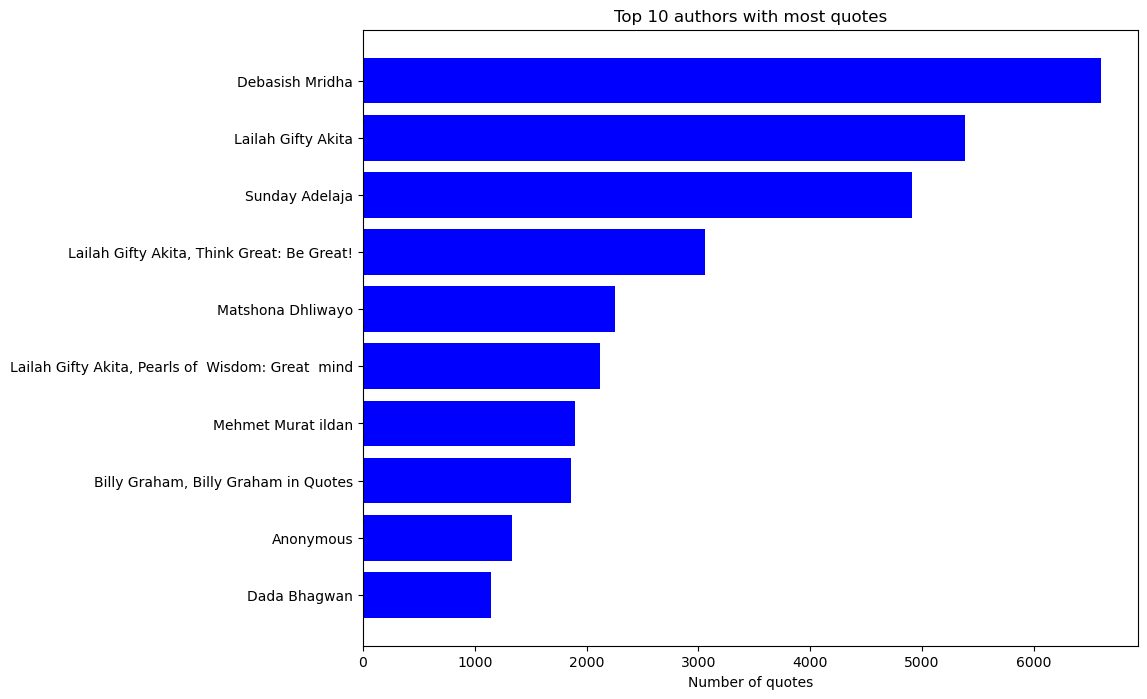

In [10]:
top_authors = df2['Author'].value_counts().nlargest(10)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(top_authors.index, top_authors.values, color='blue')
ax.invert_yaxis()
ax.set_xlabel('Number of quotes')
ax.set_title('Top 10 authors with most quotes')
plt.show()

# Find the most common tags across all quotes

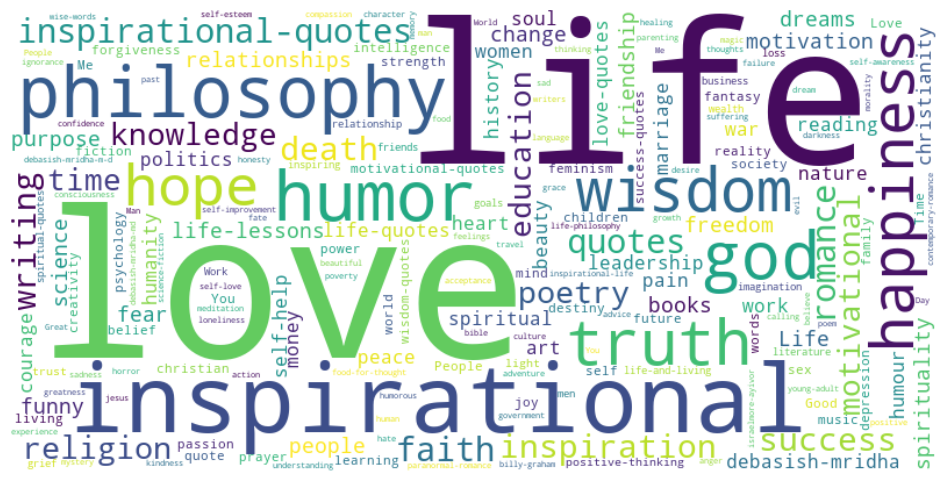

In [11]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

tags = df2['Tags'].str.split(', ')

# Create frequency count of tags
tag_counts = {}
for quote_tags in tags:
    for tag in quote_tags:
        if tag in tag_counts:
            tag_counts[tag] += 1
        else:
            tag_counts[tag] = 1

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Display word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Find the most common words from across all Quotes

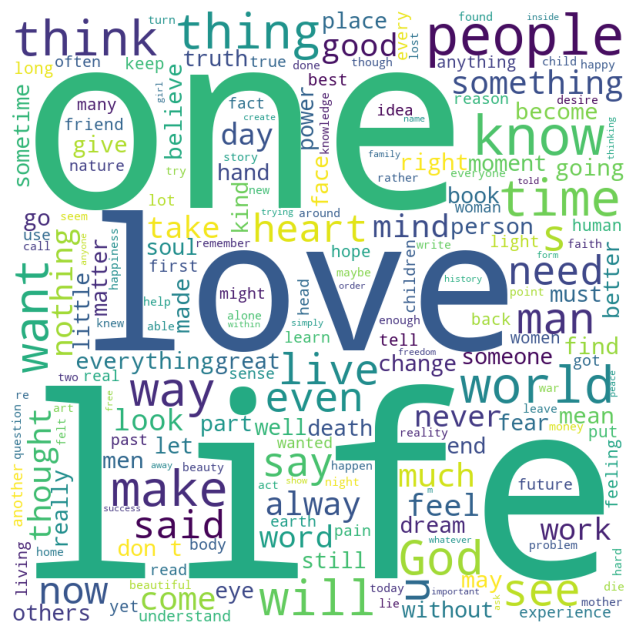

In [12]:
concat_quotes = ' '.join([i for i in df2['Quote'].astype(str)])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(concat_quotes)

# Display the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# ---------------------------------SUMMERIZATION-----------------------------------

In [13]:
import pandas as pd
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from termcolor import colored

In [14]:
sample_size = 1000
sampled_df = df2.sample(sample_size)

In [15]:
quotes = sampled_df['Quote'].tolist()

In [16]:
# Compute TF-IDF vectors for each sentence
vectorizer = TfidfVectorizer(stop_words='english')
sentence_vectors = vectorizer.fit_transform(quotes)

In [17]:
similarity_matrix = cosine_similarity(sentence_vectors)
np.fill_diagonal(similarity_matrix, 0)
most_similar_sentences = np.argmax(similarity_matrix, axis=1)
for i, quote in enumerate(quotes):
    most_similar_sentence = quotes[most_similar_sentences[i]]
    print('Original quote:', quote, "\n")
    print('Summary:', most_similar_sentence)
    print("\n\n")

Original quote: A marriage doesn't have to be perfect, but you can be perfect for each other. 

Summary: You don’t need to be perfect



Original quote: To keep the heart unwrinkled  to be hopeful  kindly  cheerful  reverent -that is to triumph over old age. 

Summary: Effort will always triumph over unapplied potential.



Original quote: Mistakes are lessons by another name. 

Summary: IS LIFE A CHOICE – I say no however when it is necessary I make bold choices may be mistakes no mistake goes waste, every mistake taught me to be more humble sincere and made to rethink not to make any more mistakes Our lives are created out of decisions and mistakes we made in the past however life continues ?Dr.T.V.Rao MD



Original quote: The outer garments of to-day will become the under-clothes of some destined to-morrow, and centuries hence a man found walking on the public highways dressed as you are will be arrested by the police for shocking the sense of propriety of the community, and so on.

# Pick a famous person and list the type of quotes they make

In [18]:
#Pick a famous person and list the type of quotes they make
quotes_by_author = {}

for index, row in sampled_df.iterrows():
    author = row['Author']
    quote = row['Quote']
    if author not in quotes_by_author:
        quotes_by_author[author] = [quote]
    else:
        quotes_by_author[author].append(quote)
        
sorted_authors = sorted(quotes_by_author.items(), key=lambda x: len(x[1]), reverse=True)

for author, quotes in sorted_authors:
    print("\n", author + ':')
    for quote in quotes:
        print('\n\t' + quote, "\n")
    print("------------------------------------------------------------------------------------------------")


 Sunday Adelaja:

	Wisdom makes it even more likely that you will be exposed to the danger of fornication. 


	Everything is a product of time because it took a particular period of time to achieve that result 


	It is complexes that prevent women with a good appearance from adequately assessing themselves 


	Only loving people who love you isn’t profitable 


	A system should be viable, it should let your dream to be developed and born 


	Discouragement comes to those Christians, who are living and are working hard to fulfill their visions and callings 


	Your old traditional way of thinking is your problem 


	Your only limitation in life is the limitation of your mind. 


	The church that emphasises on miracles are indirectly preaching that merit does not mater. 


	Discipline is when we delay our gratifications. 


	Any church that emphasizes on miracles is simply telling His members that they don’t need to qualify but depend on the supernatural power. 


	The idea of life is 

# ----------------------------Association Rule Mining---------------------------------

In [19]:
sample_size = 50000
sampled_df = df2.sample(sample_size)

In [20]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
tag_lists = sampled_df['Tags'].str.split(',').tolist()

In [22]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(tag_lists).transform(tag_lists)
df_tags = pd.DataFrame(te_array, columns=te.columns_)

In [23]:
frequent_itemsets = apriori(df_tags, min_support=0.01, use_colnames=True)

In [24]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [25]:
rules.sort_values(by='lift', ascending=False).iloc[::2].head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,( quotes),"( inspirational, philosophy)",0.01768,0.01490,0.01088,0.615385,41.300981,0.010617,2.561260
16,( philosophy),"( inspirational, quotes)",0.02818,0.01146,0.01088,0.386089,33.690177,0.010557,1.610235
10,( philosophy),( quotes),0.02818,0.01768,0.01178,0.418027,23.644059,0.011282,1.687913
15,( inspirational),"( philosophy, quotes)",0.04756,0.01178,0.01088,0.228764,19.419666,0.010320,1.281345
7,( quotes),( inspirational),0.01768,0.04756,0.01146,0.648190,13.628891,0.010619,2.707257
5,( philosophy),( inspirational),0.02818,0.04756,0.01490,0.528744,11.117405,0.013560,2.021066
0,( life),( inspirational),0.06222,0.04756,0.01312,0.210865,4.433656,0.010161,1.206941
8,( life),( love),0.06222,0.06740,0.01498,0.240759,3.572086,0.010786,1.228331
2,( inspirational),( love),0.04756,0.06740,0.01076,0.226241,3.356685,0.007554,1.205284


# Search Engine

In [26]:
df = []
for index, row in df2.iterrows():
    quote = row["Quote"]
    tags = [tag.strip() for tag in row["Tags"].split(",")]
    df.append({"Quote": quote, "Tags": tags}) 
    
quotes_index = {}
for quote in df:
    for tag in quote["Tags"]:
        if tag not in quotes_index:
            quotes_index[tag] = []
        quotes_index[tag].append(quote["Quote"])

# Step 4: Implement the search function
def search_quotes_by_tag(tag):
    if tag in quotes_index:
        return quotes_index[tag]
    else:
        return []


In [27]:
search_quotes_by_tag("Love")

['I am not enough in myself',
 'We have hands',
 "I love those who can smile in trouble, who can gather strength from distress, and grow brave by reflection. 'Tis the business of little minds to shrink, but they whose heart is firm, and whose conscience approves their conduct, will pursue their principles unto death.",
 "I love the man that can smile in trouble, that can gather strength from distress, and grow brave by reflection. 'Tis the business of little minds to shrink, but he whose heart is firm, and whose conscience approves his conduct, will pursue his principles unto death.",
 "Do what you love to do and give it your very best. Whether it's business or baseball, or the theater, or any field. If you don't love what you're doing and you can't give it your best, get out of it. Life is too short. You'll be an old man before you know it.",
 "If we listened to our intellect, we'd never have a love affair. We'd never have a friendship. We'd never go into business, because we'd be cyn

In [28]:
search_quotes_by_tag("philosophy")

["The opposite of love is not hate, it's indifference. The opposite of art is not ugliness, it's indifference. The opposite of faith is not heresy, it's indifference. And the opposite of life is not death, it's indifference.",
 "Is it possible, in the final analysis, for one human being to achieve perfect understanding of another?We can invest enormous time and energy in serious efforts to know another person, but in the end, how close can we come to that person's essence? We convince ourselves that we know the other person well, but do we really know anything important about anyone?",
 'The day the power of love overrules the love of power, the world will know peace.',
 "He suddenly recalled from Plato's Symposium: People were hermaphrodites until God split then in two, and now all the halves wander the world over seeking one another. Love is the longing for the half of ourselves we have lost.",
 'It does not matter how long you are spending on the earth, how much money you have gathe

In [29]:
search_quotes_by_tag("inspirational")

["You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth.",
 'Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only love can do that.',
 'We accept the love we think we deserve.',
 "The opposite of love is not hate, it's indifference. The opposite of art is not ugliness, it's indifference. The opposite of faith is not heresy, it's indifference. And the opposite of life is not death, it's indifference.",
 "This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, th